<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Engenharia Financeira com Inteligência Artificial</font>
## <font color='blue'>Projeto 7</font>
## <font color='blue'>Previsão de Risco em Operações Financeiras</font>

## Instalando e Carregando Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
#!pip install -q xgboost

In [3]:
# Imports
import sklearn
import xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import max_error, explained_variance_score
from sklearn.metrics import accuracy_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [4]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



## Trabalhando com Dados Repletos de Problemas

In [5]:
# Carrega o dataset
df_dsa = pd.read_csv("dataset.csv")

In [6]:
# Shape
df_dsa.shape

(600, 13)

In [7]:
# Amostra
df_dsa.head()

,ID_Emprestimo,Genero,Casado,Dependentes,Educacao,Empreendedor,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Historico_Credito,LocalResidencia,StatusEmprestimo
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_Emprestimo                   600 non-null    object 
 1   Genero                          587 non-null    object 
 2   Casado                          597 non-null    object 
 3   Dependentes                     585 non-null    object 
 4   Educacao                        600 non-null    object 
 5   Empreendedor                    570 non-null    object 
 6   SalarioAnualAplicantePrincipal  600 non-null    int64  
 7   SalarioAnualCoAplicante         600 non-null    float64
 8   Score_Risco                     579 non-null    float64
 9   TempoEmprestimo                 586 non-null    float64
 10  Historico_Credito               551 non-null    float64
 11  LocalResidencia                 600 non-null    object 
 12  StatusEmprestimo                600 

## Análise Exploratória, Limpeza e Engenharia de Atributos

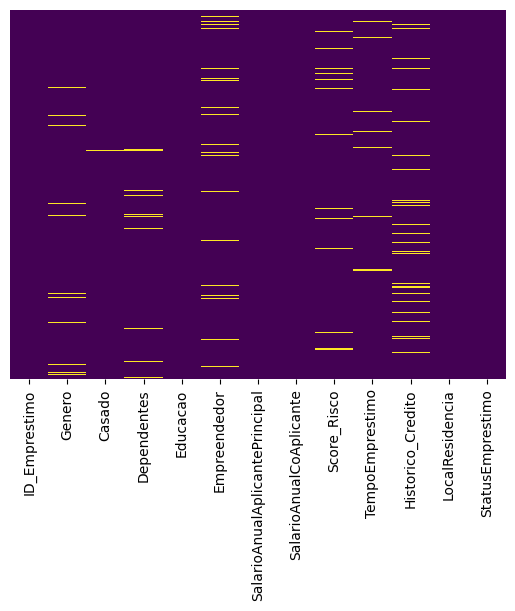

In [9]:
# Mapa de calor para visualizar os valores ausentes
sns.heatmap(df_dsa.isnull(), yticklabels = False, cbar = False, cmap = 'viridis');

In [10]:
# Percentual de valores ausentes
percentual_ausentes = df_dsa.isnull().mean() * 100
print(percentual_ausentes)

ID_Emprestimo                     0.000000
Genero                            2.166667
Casado                            0.500000
Dependentes                       2.500000
Educacao                          0.000000
Empreendedor                      5.000000
SalarioAnualAplicantePrincipal    0.000000
SalarioAnualCoAplicante           0.000000
Score_Risco                       3.500000
TempoEmprestimo                   2.333333
Historico_Credito                 8.166667
LocalResidencia                   0.000000
StatusEmprestimo                  0.000000
dtype: float64


In [11]:
# Colunas
df_dsa.columns

Index(['ID_Emprestimo', 'Genero', 'Casado', 'Dependentes', 'Educacao',
       'Empreendedor', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'Historico_Credito', 'LocalResidencia', 'StatusEmprestimo'],
      dtype='object')

In [12]:
# Contagem de categorias
df_dsa['Genero'].value_counts()

Genero
Male      473
Female    114
Name: count, dtype: int64

In [13]:
# Cria variáveis dummy com as categorias de gênero
genero = pd.get_dummies(df_dsa['Genero'], drop_first = True)

In [14]:
# Drop de variáveis que não serão mais necessárias
df_dsa.drop(['Genero', 'ID_Emprestimo'], axis = 1, inplace = True)

In [15]:
# Adiciona as variáveis dummy de volta ao dataframe
df_dsa = pd.concat([df_dsa, genero], axis = 1)

In [16]:
df_dsa.sample(5)

,Casado,Dependentes,Educacao,Empreendedor,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Historico_Credito,LocalResidencia,StatusEmprestimo,Male
26,Yes,0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y,True
467,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y,False
48,Yes,0,Graduate,No,2645,3440.0,120.0,120.0,0.0,Urban,N,False
344,Yes,2,Graduate,NaN,2583,2330.0,125.0,360.0,1.0,Rural,Y,False
436,No,0,Graduate,No,11926,1851.0,50.0,360.0,1.0,Semiurban,Y,True


In [17]:
# Ajusta o nome da coluna
df_dsa = df_dsa.rename(columns = {'Male':'Genero_Masculino'})

In [18]:
df_dsa.sample(5)

,Casado,Dependentes,Educacao,Empreendedor,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Historico_Credito,LocalResidencia,StatusEmprestimo,Genero_Masculino
276,Yes,0,Graduate,No,3993,3274.0,207.0,360.0,1.0,Semiurban,Y,True
156,Yes,1,Graduate,No,6000,0.0,160.0,360.0,NaN,Rural,Y,True
247,Yes,1,Not Graduate,No,6608,0.0,137.0,180.0,1.0,Urban,Y,True
383,No,0,Graduate,Yes,7167,0.0,128.0,360.0,1.0,Urban,Y,True
431,No,0,Graduate,No,6500,0.0,105.0,360.0,0.0,Rural,N,True


In [19]:
# Contagem de categorias
df_dsa['Casado'].value_counts()

Casado
Yes    388
No     209
Name: count, dtype: int64

In [20]:
# Cria variáveis dummy para o estado civil
casado = pd.get_dummies(df_dsa['Casado'], drop_first = True)

In [21]:
# Contagem de categorias
df_dsa['Educacao'].value_counts()

Educacao
Graduate        462
Not Graduate    138
Name: count, dtype: int64

In [22]:
# Cria variáveis dummy para o nível educacional
graduado = pd.get_dummies(df_dsa['Educacao'], drop_first = True)

In [23]:
# Drop das variáveis originais
df_dsa.drop(['Casado', 'Educacao'], axis = 1, inplace = True)

In [24]:
# Adiciona as variáveis dummy de volta ao dataframe
df_dsa = pd.concat([df_dsa, casado, graduado], axis = 1)

In [25]:
df_dsa.sample(5)

,Dependentes,Empreendedor,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Historico_Credito,LocalResidencia,StatusEmprestimo,Genero_Masculino,Yes,Not Graduate
299,1,No,2014,2925.0,113.0,360.0,1.0,Urban,N,True,True,False
467,0,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y,False,True,False
86,2,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y,True,True,True
318,1,No,3541,0.0,112.0,360.0,NaN,Semiurban,Y,False,False,False
411,0,NaN,6256,0.0,160.0,360.0,NaN,Urban,Y,True,True,False


In [26]:
# Ajusta o nome das variáveis
df_dsa = df_dsa.rename(columns = {'Yes':'Casado', 'Not Graduate':'Sem_Graduacao'})

In [27]:
df_dsa.sample(5)

,Dependentes,Empreendedor,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Historico_Credito,LocalResidencia,StatusEmprestimo,Genero_Masculino,Casado,Sem_Graduacao
586,0,No,2297,1522.0,104.0,360.0,1.0,Urban,Y,True,True,False
419,0,No,13246,1417.0,138.0,360.0,1.0,Semiurban,Y,True,True,False
578,1,No,1782,2232.0,107.0,360.0,1.0,Rural,Y,True,True,False
455,2,No,3859,0.0,96.0,360.0,1.0,Semiurban,Y,True,True,False
580,2,No,6540,0.0,205.0,120.0,1.0,Semiurban,Y,True,True,False


In [28]:
df_dsa.columns

Index(['Dependentes', 'Empreendedor', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'Historico_Credito', 'LocalResidencia', 'StatusEmprestimo',
       'Genero_Masculino', 'Casado', 'Sem_Graduacao'],
      dtype='object')

In [29]:
# Contagem de categorias
df_dsa['Empreendedor'].value_counts()

Empreendedor
No     489
Yes     81
Name: count, dtype: int64

In [30]:
# Cria variáveis dummy
empreendedor = pd.get_dummies(df_dsa['Empreendedor'], drop_first = True)

In [31]:
# Drop de variável não utilizada
df_dsa.drop(['Empreendedor'], axis = 1, inplace = True)

In [32]:
# Concatena os dados
df_dsa = pd.concat([df_dsa, empreendedor], axis = 1)

In [33]:
df_dsa.sample(5)

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Historico_Credito,LocalResidencia,StatusEmprestimo,Genero_Masculino,Casado,Sem_Graduacao,Yes
279,0,4100,0.0,124.0,360.0,NaN,Rural,Y,False,True,True,False
70,0,3208,3066.0,172.0,360.0,1.0,Urban,Y,True,True,False,False
252,0,2583,2167.0,104.0,360.0,1.0,Rural,Y,True,False,True,True
284,0,120667,0.0,NaN,360.0,1.0,Rural,N,True,True,False,False
250,0,1668,3890.0,201.0,360.0,0.0,Semiurban,N,True,True,True,False


In [34]:
# Renomeia a coluna
df_dsa = df_dsa.rename(columns = {'Yes':'Empreendedor'})

In [35]:
df_dsa.sample(10)

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Historico_Credito,LocalResidencia,StatusEmprestimo,Genero_Masculino,Casado,Sem_Graduacao,Empreendedor
91,2,6250,5654.0,188.0,180.0,1.0,Semiurban,Y,True,True,False,False
389,0,5488,0.0,125.0,360.0,1.0,Rural,Y,True,True,False,False
423,1,7250,1667.0,110.0,NaN,0.0,Urban,N,True,True,False,False
321,3+,4342,189.0,124.0,360.0,1.0,Semiurban,Y,True,True,False,False
158,0,2980,2083.0,120.0,360.0,1.0,Rural,Y,True,False,False,False
357,1,3875,0.0,67.0,360.0,1.0,Urban,N,True,True,False,False
62,0,2609,3449.0,165.0,180.0,0.0,Rural,N,True,True,True,True
175,0,3497,1964.0,116.0,360.0,1.0,Rural,Y,True,True,False,False
135,3+,4000,7750.0,290.0,360.0,1.0,Semiurban,N,True,True,False,False
36,0,1828,1330.0,100.0,NaN,0.0,Urban,N,True,True,False,False


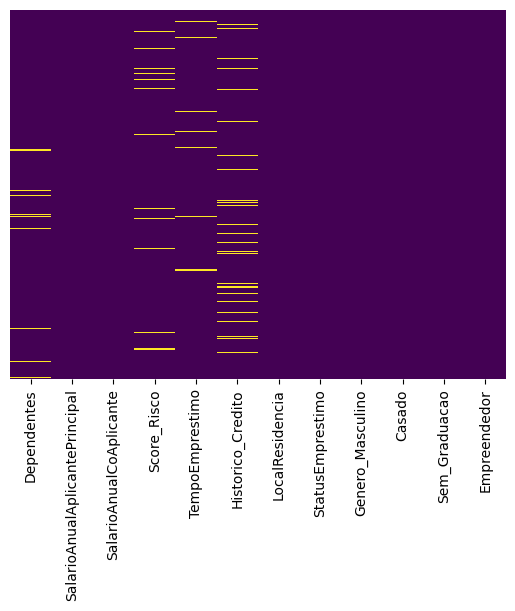

In [36]:
# Mapa de calor de valores ausentes
sns.heatmap(df_dsa.isnull(), yticklabels = False, cbar = False, cmap = 'viridis');

In [37]:
df_dsa.columns

Index(['Dependentes', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'Historico_Credito', 'LocalResidencia', 'StatusEmprestimo',
       'Genero_Masculino', 'Casado', 'Sem_Graduacao', 'Empreendedor'],
      dtype='object')

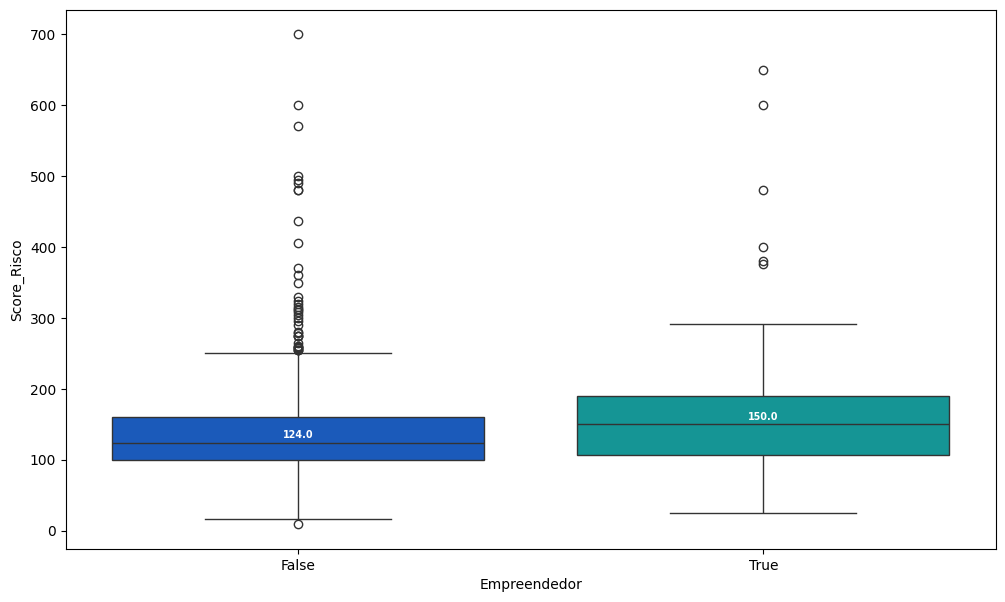

In [38]:
# Plot
plt.figure(figsize = (12, 7))
bx = sns.boxplot(x = 'Empreendedor', y = 'Score_Risco', data = df_dsa, palette = 'winter')
medians = df_dsa.groupby(['Empreendedor'])['Score_Risco'].median()
vertical_offset = df_dsa['Score_Risco'].median() * 0.05
for xtick in bx.get_xticks():
    bx.text(xtick,
            medians[xtick] + vertical_offset,
            medians[xtick],
            horizontalalignment = 'center',
            size = 'x-small',
            color = 'w',
            weight = 'semibold')

In [39]:
# Função de imputação dos valores ausentes com a mediana
def func_imputacao(cols):
    
    # Extrai o valor da primeira coluna recebida como argumento
    score_risco = cols[0]
    
    # Extrai o valor da segunda coluna
    selfemp = cols[1]
    
    # Verifica se o valor do score é nulo
    if pd.isnull(score_risco):

        # Se a pessoa é autônoma (selfemp == 1), retorna o valor de 150
        if selfemp == 1:
            return 150
        else:
            # Caso contrário, retorna o valor de 125
            return 125

    else:
        # Se o valor do score não é nulo, retorna o próprio valor do score
        return score_risco

In [40]:
# Aplica a função
df_dsa['Score_Risco'] = df_dsa[['Score_Risco', 'Empreendedor']].apply(func_imputacao, axis = 1)

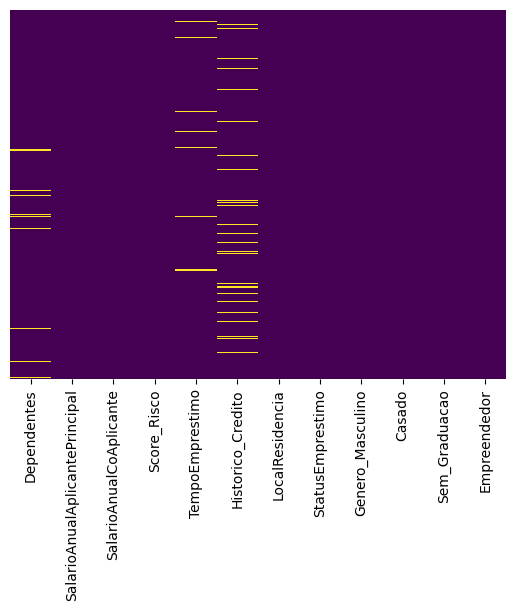

In [41]:
# Mapa de calor dos valores ausentes
sns.heatmap(df_dsa.isnull(), yticklabels = False, cbar = False, cmap = 'viridis');

In [42]:
df_dsa.columns

Index(['Dependentes', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'Historico_Credito', 'LocalResidencia', 'StatusEmprestimo',
       'Genero_Masculino', 'Casado', 'Sem_Graduacao', 'Empreendedor'],
      dtype='object')

In [43]:
# Contagem de categorias
df_dsa['Historico_Credito'].value_counts()

Historico_Credito
1.0    463
0.0     88
Name: count, dtype: int64

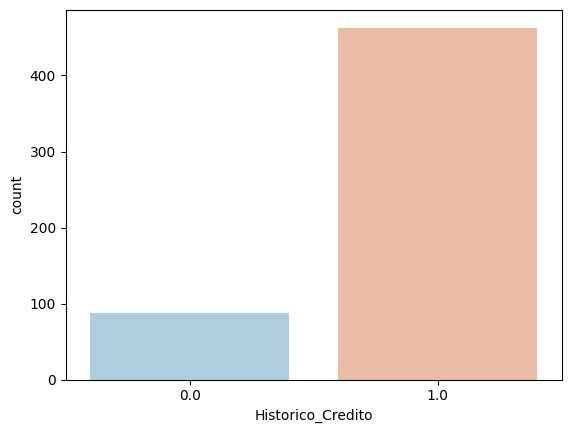

In [44]:
# Count plot
sns.countplot(x = 'Historico_Credito', data = df_dsa, palette = 'RdBu_r');

Essa é uma variável difícil de compreender. Se você não compreender para que serve a variável, não use-a!

In [45]:
# Drop da variável (decisão de negócio)
df_dsa.drop(['Historico_Credito'], axis = 1, inplace = True)

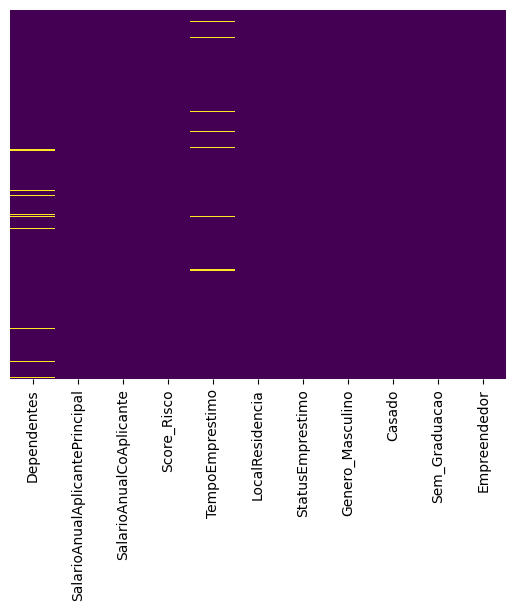

In [46]:
# Mapa de calor
sns.heatmap(df_dsa.isnull(), yticklabels = False, cbar = False, cmap = 'viridis');

In [47]:
df_dsa.columns

Index(['Dependentes', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'LocalResidencia', 'StatusEmprestimo', 'Genero_Masculino', 'Casado',
       'Sem_Graduacao', 'Empreendedor'],
      dtype='object')

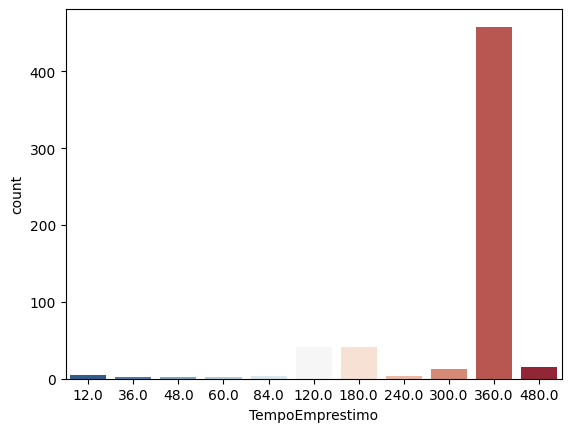

In [48]:
# Count plot
sns.countplot(x = 'TempoEmprestimo', data = df_dsa, palette = 'RdBu_r');

In [49]:
# Percentual de valores ausentes
percentual_ausentes = df_dsa.isnull().mean() * 100
print(percentual_ausentes)

Dependentes                       2.500000
SalarioAnualAplicantePrincipal    0.000000
SalarioAnualCoAplicante           0.000000
Score_Risco                       0.000000
TempoEmprestimo                   2.333333
LocalResidencia                   0.000000
StatusEmprestimo                  0.000000
Genero_Masculino                  0.000000
Casado                            0.000000
Sem_Graduacao                     0.000000
Empreendedor                      0.000000
dtype: float64


In [50]:
# Remove os valores ausentes
df_dsa = df_dsa.dropna(subset = ['TempoEmprestimo'])

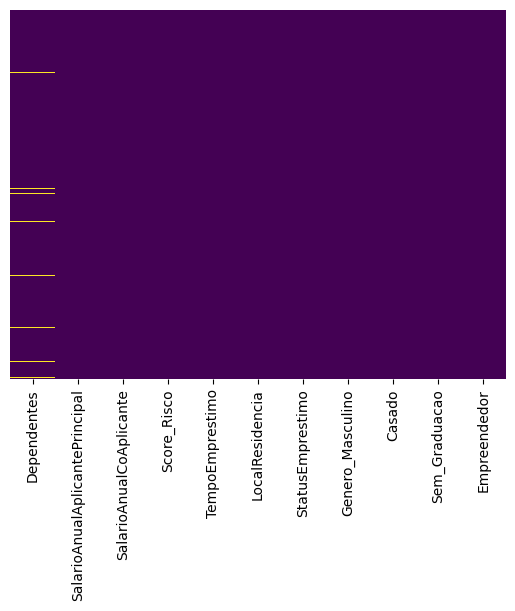

In [51]:
# Mapa de calor
sns.heatmap(df_dsa.isnull(), yticklabels = False, cbar = False, cmap = 'viridis');

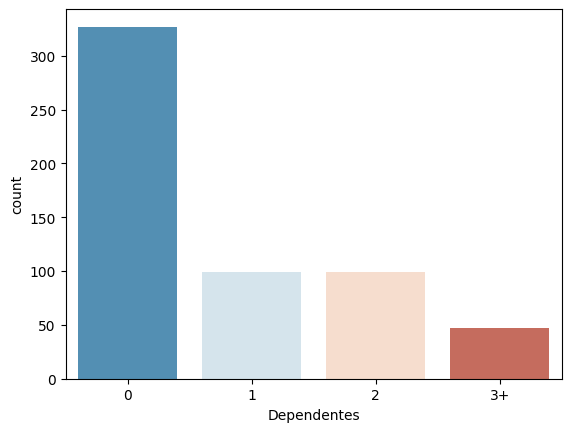

In [52]:
# Count plot
sns.countplot(x = 'Dependentes', data = df_dsa, palette = 'RdBu_r');

In [53]:
# Ajusta o nome da categoria
df_dsa = df_dsa.replace(to_replace = '3+', value = 3)

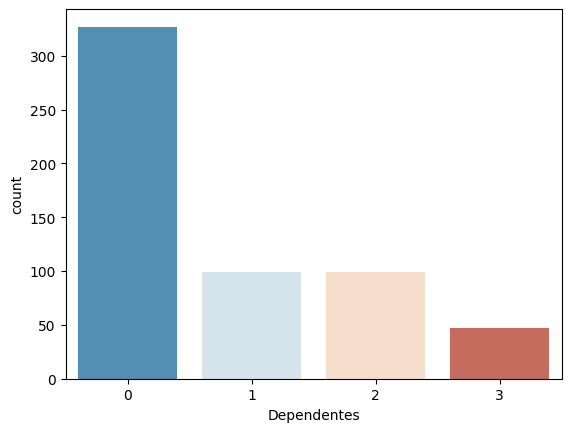

In [54]:
# Count plot
sns.countplot(x = 'Dependentes', data = df_dsa, palette = 'RdBu_r');

In [55]:
# Percentual de valores ausentes
percentual_ausentes = df_dsa.isnull().mean() * 100
print(percentual_ausentes)

Dependentes                       2.389078
SalarioAnualAplicantePrincipal    0.000000
SalarioAnualCoAplicante           0.000000
Score_Risco                       0.000000
TempoEmprestimo                   0.000000
LocalResidencia                   0.000000
StatusEmprestimo                  0.000000
Genero_Masculino                  0.000000
Casado                            0.000000
Sem_Graduacao                     0.000000
Empreendedor                      0.000000
dtype: float64


In [56]:
# Remove os valores ausentes
df_dsa = df_dsa.dropna(subset = ['Dependentes'])

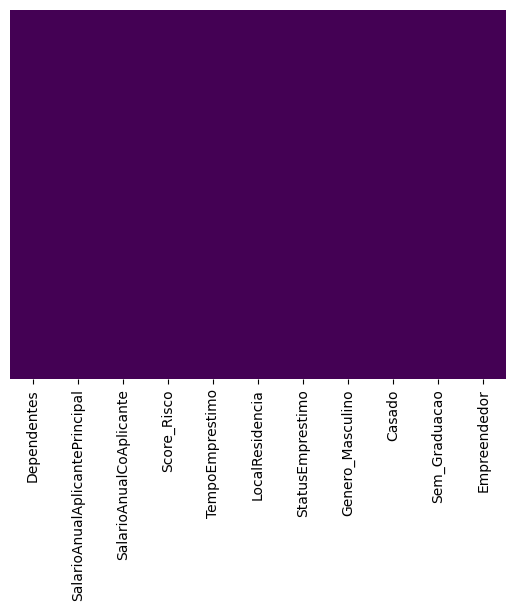

In [57]:
# Mapa de calor
sns.heatmap(df_dsa.isnull(), yticklabels = False, cbar = False, cmap = 'viridis');

In [58]:
# Percentual de valores ausentes
percentual_ausentes = df_dsa.isnull().mean() * 100
print(percentual_ausentes)

Dependentes                       0.0
SalarioAnualAplicantePrincipal    0.0
SalarioAnualCoAplicante           0.0
Score_Risco                       0.0
TempoEmprestimo                   0.0
LocalResidencia                   0.0
StatusEmprestimo                  0.0
Genero_Masculino                  0.0
Casado                            0.0
Sem_Graduacao                     0.0
Empreendedor                      0.0
dtype: float64


In [59]:
df_dsa.columns

Index(['Dependentes', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'LocalResidencia', 'StatusEmprestimo', 'Genero_Masculino', 'Casado',
       'Sem_Graduacao', 'Empreendedor'],
      dtype='object')

In [60]:
df_dsa.head()

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,LocalResidencia,StatusEmprestimo,Genero_Masculino,Casado,Sem_Graduacao,Empreendedor
0,0,5849,0.0,125.0,360.0,Urban,Y,True,False,False,False
1,1,4583,1508.0,128.0,360.0,Rural,N,True,True,False,False
2,0,3000,0.0,66.0,360.0,Urban,Y,True,True,False,True
3,0,2583,2358.0,120.0,360.0,Urban,Y,True,True,True,False
4,0,6000,0.0,141.0,360.0,Urban,Y,True,False,False,False


In [61]:
# Cria variáveis dummy
status_emprestimo = pd.get_dummies(df_dsa['StatusEmprestimo'], drop_first = True)

In [62]:
# Drop da coluna original
df_dsa.drop(['StatusEmprestimo'], axis = 1, inplace = True)

In [63]:
# Concatena
df_dsa = pd.concat([df_dsa, status_emprestimo], axis = 1)

In [64]:
df_dsa.sample(5)

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,LocalResidencia,Genero_Masculino,Casado,Sem_Graduacao,Empreendedor,Y
224,0,6250,0.0,128.0,360.0,Semiurban,True,True,False,False,True
586,0,2297,1522.0,104.0,360.0,Urban,True,True,False,False,True
94,0,3620,0.0,25.0,120.0,Semiurban,True,False,True,False,True
368,1,16325,0.0,175.0,360.0,Semiurban,True,True,False,False,True
190,0,4885,0.0,48.0,360.0,Rural,True,False,True,False,True


In [65]:
# Ajusta o nome da coluna
df_dsa = df_dsa.rename(columns = {'Y':'Recebe_Emprestimo'})

In [66]:
df_dsa.sample(5)

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,LocalResidencia,Genero_Masculino,Casado,Sem_Graduacao,Empreendedor,Recebe_Emprestimo
482,0,2083,3150.0,128.0,360.0,Semiurban,True,True,False,False,True
109,3,2071,754.0,94.0,480.0,Semiurban,True,True,True,False,True
127,0,3865,1640.0,125.0,360.0,Rural,True,False,False,False,True
488,2,4583,2083.0,160.0,360.0,Semiurban,True,True,False,True,True
416,1,12600,0.0,160.0,360.0,Urban,False,False,False,False,False


In [67]:
# Cria variáveis dummy
localresidencia = pd.get_dummies(df_dsa['LocalResidencia'], drop_first = True)

In [68]:
# Drop da variável original
df_dsa.drop(['LocalResidencia'], axis = 1, inplace = True)

In [69]:
# Concatena
df_dsa = pd.concat([df_dsa, localresidencia], axis = 1)

In [70]:
df_dsa.head()

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Genero_Masculino,Casado,Sem_Graduacao,Empreendedor,Recebe_Emprestimo,Semiurban,Urban
0,0,5849,0.0,125.0,360.0,True,False,False,False,True,False,True
1,1,4583,1508.0,128.0,360.0,True,True,False,False,False,False,False
2,0,3000,0.0,66.0,360.0,True,True,False,True,True,False,True
3,0,2583,2358.0,120.0,360.0,True,True,True,False,True,False,True
4,0,6000,0.0,141.0,360.0,True,False,False,False,True,False,True


In [71]:
# Ajusta o nome da coluna
df_dsa = df_dsa.rename(columns = {'Semiurban':'AreaSemiUrbana'})

In [72]:
# Ajusta o nome da coluna
df_dsa = df_dsa.rename(columns = {'Urban':'AreaUrbana'})

In [73]:
df_dsa.sample(10)

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Genero_Masculino,Casado,Sem_Graduacao,Empreendedor,Recebe_Emprestimo,AreaSemiUrbana,AreaUrbana
510,0,3598,1287.0,100.0,360.0,True,False,True,False,False,False,False
283,0,1811,1666.0,54.0,360.0,False,False,False,False,True,False,True
171,3,51763,0.0,700.0,300.0,False,True,False,False,True,False,True
129,0,6080,2569.0,182.0,360.0,True,True,False,False,False,False,False
348,0,6333,4583.0,259.0,12.0,True,True,True,False,True,True,False
96,0,12484,2302.0,137.0,360.0,False,True,False,False,True,True,False
29,2,3750,2083.0,120.0,120.0,False,False,False,False,True,True,False
80,0,3846,0.0,111.0,360.0,False,False,False,False,True,True,False
329,0,12500,0.0,67.0,360.0,False,False,False,False,True,False,True
528,1,2679,1302.0,94.0,360.0,True,False,True,False,True,True,False


## Pré-Processamento dos Dados Para Classificação

In [74]:
df_dsa.columns

Index(['Dependentes', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'Genero_Masculino', 'Casado', 'Sem_Graduacao', 'Empreendedor',
       'Recebe_Emprestimo', 'AreaSemiUrbana', 'AreaUrbana'],
      dtype='object')

In [75]:
# Separando as variáveis independentes (X) e a variável dependente (y)
X = df_dsa.drop(columns = ['Recebe_Emprestimo'])
y = df_dsa['Recebe_Emprestimo']

In [76]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.30)

In [77]:
X_treino

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Genero_Masculino,Casado,Sem_Graduacao,Empreendedor,AreaSemiUrbana,AreaUrbana
59,2,3357,2859.0,144.0,360.0,True,True,True,False,False,True
537,2,3617,0.0,107.0,360.0,True,False,False,False,True,False
297,1,4666,0.0,135.0,360.0,False,True,False,False,False,True
313,2,5746,0.0,144.0,84.0,True,True,False,True,False,False
77,1,1000,3022.0,110.0,360.0,True,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
157,1,9538,0.0,187.0,360.0,True,True,False,False,False,True
130,0,20166,0.0,650.0,480.0,True,False,False,True,False,True
107,0,7333,0.0,120.0,360.0,True,False,False,False,False,False
570,1,3417,1750.0,186.0,360.0,True,True,False,False,False,True


In [78]:
# Cria o padronizador
dsa_scaler_cls = StandardScaler()

In [79]:
# Treina o padronizador
dsa_scaler_cls.fit(X_treino)

,copy,True
,with_mean,True
,with_std,True


In [80]:
# Aplica o padronizador em treino e teste
X_treino_scaled = dsa_scaler_cls.transform(X_treino)
X_teste_scaled = dsa_scaler_cls.transform(X_teste)

## Classificação com KNN

Veja a descrição no videobook do Capítulo 13 do curso.

In [81]:
# Cria o modelo
modelo_cls = KNeighborsClassifier(n_neighbors = 3)

In [82]:
# Treina o modelo
modelo_cls.fit(X_treino_scaled, y_treino)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [83]:
# Previsões com o modelo usando dados de teste
pred = modelo_cls.predict(X_teste_scaled)

In [84]:
print(confusion_matrix(y_teste, pred))

[[ 9 46]
 [19 98]]


In [85]:
print(classification_report(y_teste, pred))

              precision    recall  f1-score   support

       False       0.32      0.16      0.22        55
        True       0.68      0.84      0.75       117

    accuracy                           0.62       172
   macro avg       0.50      0.50      0.48       172
weighted avg       0.57      0.62      0.58       172



Será que usamos o melhor valor de n_neighbors?

In [86]:
# Lista para os erros
error_rate = []

# Loop
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_treino_scaled, y_treino)
    pred_i = knn.predict(X_teste_scaled)
    error_rate.append(np.mean(pred_i != y_teste))

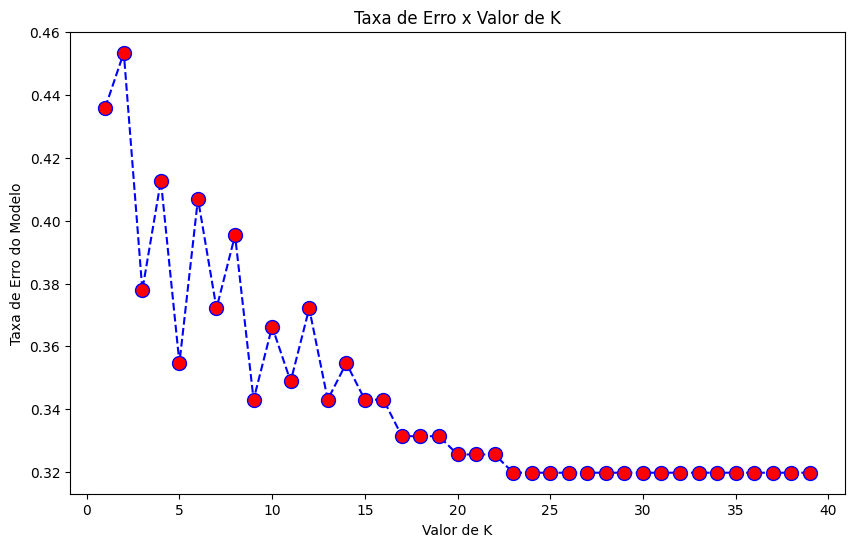

In [87]:
# Plot
plt.figure(figsize = (10,6))
plt.plot(range(1,40),
         error_rate,
         color = 'blue', 
         linestyle = 'dashed', 
         marker = 'o', 
         markerfacecolor = 'red', 
         markersize = 10)
plt.title('Taxa de Erro x Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Taxa de Erro do Modelo')
plt.show()

In [88]:
# Vamos criar outra versão do modelo
knn = KNeighborsClassifier(n_neighbors = 15)

In [89]:
# Treinamento
knn.fit(X_treino_scaled, y_treino)

,n_neighbors,15
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [90]:
# Previsões
pred = knn.predict(X_teste_scaled)

In [91]:
print(confusion_matrix(y_teste, pred))

[[  0  55]
 [  4 113]]


In [92]:
print(classification_report(y_teste, pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        55
        True       0.67      0.97      0.79       117

    accuracy                           0.66       172
   macro avg       0.34      0.48      0.40       172
weighted avg       0.46      0.66      0.54       172



In [93]:
print(accuracy_score(y_teste, pred))

0.6569767441860465


> Deploy do Modelo de Classificação

In [94]:
X_teste.columns

Index(['Dependentes', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'Genero_Masculino', 'Casado', 'Sem_Graduacao', 'Empreendedor',
       'AreaSemiUrbana', 'AreaUrbana'],
      dtype='object')

In [95]:
# Novo cliente
novo_cliente_cls = np.array([1,4554,1229.0,158.0,360.0,True,True,True,False,False,True]).reshape(1, -1)
novo_cliente_cls = dsa_scaler_cls.transform(novo_cliente_cls)

In [96]:
# Previsão
pred_novo_cliente_cls = knn.predict(novo_cliente_cls)

if pred_novo_cliente_cls[0] == True:
    print('Este cliente pode receber empréstimo!')
else:
    print('Não recomendo conceder empréstimo a este cliente!')

Este cliente pode receber empréstimo!


## Pré-Processamento dos Dados Para Regressão

In [97]:
df_dsa.columns

Index(['Dependentes', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'Genero_Masculino', 'Casado', 'Sem_Graduacao', 'Empreendedor',
       'Recebe_Emprestimo', 'AreaSemiUrbana', 'AreaUrbana'],
      dtype='object')

In [98]:
# Separando as variáveis independentes (X) e a variável dependente (y)
X = df_dsa.drop(columns = ['Score_Risco'])
y = df_dsa['Score_Risco']

In [99]:
# Divide em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.30)

In [100]:
# Cria o padronizador
dsa_scaler_reg = StandardScaler()

In [101]:
# Treina o padronizador
dsa_scaler_reg.fit(X_treino)

,copy,True
,with_mean,True
,with_std,True


In [102]:
# Aplica o padronizador em treino e teste
X_treino_scaled = dsa_scaler_reg.transform(X_treino)
X_teste_scaled = dsa_scaler_reg.transform(X_teste)

## Versão 1 do Modelo de Previsão de Risco - Regressão com Modelo Linear

Veja a descrição no videobook do Capítulo 13 do curso.

In [103]:
# Cria o modelo
modelo_dsa_v1 = LinearRegression()

In [104]:
# Treina o modelo
modelo_dsa_v1.fit(X_treino_scaled, y_treino)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [105]:
# Previsões em treino
pred1_treino = modelo_dsa_v1.predict(X_treino_scaled)

In [106]:
print(f"Erro do Modelo: {max_error(y_treino, pred1_treino)}")
print(f"Explained Variance Score: {explained_variance_score(y_treino, pred1_treino)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_treino, pred1_treino)}")

Erro do Modelo: 440.2861312361209
Explained Variance Score: 0.32839254868576295
Mean Absolute Error: 46.88732060932317


In [107]:
# Previsões em teste
pred1_teste = modelo_dsa_v1.predict(X_teste_scaled)

In [108]:
print(f"Erro do Modelo: {max_error(y_teste, pred1_teste)}")
print(f"Explained Variance Score: {explained_variance_score(y_teste, pred1_teste)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_teste, pred1_teste)}")

Erro do Modelo: 518.6097764440369
Explained Variance Score: -0.5444773596723604
Mean Absolute Error: 50.33644842002269


## Versão 2 do Modelo de Previsão de Risco - Regressão com Modelo Bayesiano

Veja a descrição no videobook do Capítulo 13 do curso.

In [109]:
# Cria o modelo
modelo_dsa_v2 = BayesianRidge()

In [110]:
# Treina o modelo
modelo_dsa_v2.fit(X_treino_scaled, y_treino)

,max_iter,300
,tol,0.001
,alpha_1,1e-06
,alpha_2,1e-06
,lambda_1,1e-06
,lambda_2,1e-06
,alpha_init,None
,lambda_init,None
,compute_score,False
,fit_intercept,True
,copy_X,True


In [111]:
# Previsões em treino
pred2_treino = modelo_dsa_v2.predict(X_treino_scaled)

In [112]:
print(f"Erro do Modelo: {max_error(y_treino, pred2_treino)}")
print(f"Explained Variance Score: {explained_variance_score(y_treino, pred2_treino)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_treino, pred2_treino)}")

Erro do Modelo: 443.8095021743785
Explained Variance Score: 0.3272565302176531
Mean Absolute Error: 46.79907288509224


In [113]:
# Previsões em teste
pred2_teste = modelo_dsa_v2.predict(X_teste_scaled)

In [114]:
print(f"Erro do Modelo: {max_error(y_teste, pred2_teste)}")
print(f"Explained Variance Score: {explained_variance_score(y_teste, pred2_teste)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_teste, pred2_teste)}")

Erro do Modelo: 488.12739338997005
Explained Variance Score: -0.46011866959476055
Mean Absolute Error: 49.94781282487777


## Versão 3 do Modelo de Previsão de Risco - Regressão com Random Forest

Veja a descrição no videobook do Capítulo 13 do curso.

In [115]:
# Cria o modelo
modelo_dsa_v3 = RandomForestRegressor(max_depth = 2, random_state = 0)

In [116]:
# Treina o modelo
modelo_dsa_v3.fit(X_treino_scaled, y_treino)

,n_estimators,100
,criterion,'squared_error'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [117]:
# Previsões em treino
pred3_treino = modelo_dsa_v3.predict(X_treino_scaled)

In [118]:
print(f"Erro do Modelo: {max_error(y_treino, pred3_treino)}")
print(f"Explained Variance Score: {explained_variance_score(y_treino, pred3_treino)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_treino, pred3_treino)}")

Erro do Modelo: 306.99894736055853
Explained Variance Score: 0.5305368977598122
Mean Absolute Error: 41.68668153057035


In [119]:
# Previsões em teste
pred3_teste = modelo_dsa_v3.predict(X_teste_scaled)

In [120]:
print(f"Erro do Modelo: {max_error(y_teste, pred3_teste)}")
print(f"Explained Variance Score: {explained_variance_score(y_teste, pred3_teste)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_teste, pred3_teste)}")

Erro do Modelo: 395.05864355709656
Explained Variance Score: -0.005386756623090072
Mean Absolute Error: 45.3484127884947


## Versão 4 do Modelo de Previsão de Risco - Regressão com XGBoost

Veja a descrição no videobook do Capítulo 13 do curso.

In [121]:
# Cria o modelo
modelo_dsa_v4 = XGBRegressor()

In [122]:
# Treina o modelo
modelo_dsa_v4.fit(X_treino_scaled, y_treino)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [123]:
# Previsões em treino
pred4_treino = modelo_dsa_v4.predict(X_treino_scaled)

In [124]:
print(f"Erro do Modelo: {max_error(y_treino, pred4_treino)}")
print(f"Explained Variance Score: {explained_variance_score(y_treino, pred4_treino)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_treino, pred4_treino)}")

Erro do Modelo: 8.000137329101562
Explained Variance Score: 0.9995243340081754
Mean Absolute Error: 1.3176647377014161


In [125]:
# Previsões em teste
pred4_teste = modelo_dsa_v4.predict(X_teste_scaled)

In [126]:
print(f"Erro do Modelo: {max_error(y_teste, pred4_teste)}")
print(f"Explained Variance Score: {explained_variance_score(y_teste, pred4_teste)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_teste, pred4_teste)}")

Erro do Modelo: 341.5518798828125
Explained Variance Score: -0.20685098761331888
Mean Absolute Error: 52.33958212164946


## O Que Fazer Quando o Modelo Apresenta Overfitting?

Vamos usar o modelo que apresentou a melhor opção entre todos até aqui e tentar alguns ajustes.

In [127]:
# Obtém a importância das variáveis
importancias = modelo_dsa_v3.feature_importances_

In [128]:
# Cria um DataFrame para facilitar a visualização
importancias_df = pd.DataFrame({
    'Variável': X_treino.columns,
    'Importância': importancias
})

In [129]:
# Ordena o DataFrame pela importância
importancias_df = importancias_df.sort_values(by = 'Importância', ascending = False)

In [130]:
importancias_df

,Variável,Importância
1,SalarioAnualAplicantePrincipal,0.883930
2,SalarioAnualCoAplicante,0.058434
10,AreaUrbana,0.013676
9,AreaSemiUrbana,0.013394
3,TempoEmprestimo,0.012726
0,Dependentes,0.009013
5,Casado,0.005658
7,Empreendedor,0.001334
8,Recebe_Emprestimo,0.001251
4,Genero_Masculino,0.000585


In [131]:
# Seleciona as 3 variáveis mais importantes
top_3_variaveis = importancias_df['Variável'].head(3).values

In [132]:
# Cria um novo DataFrame com as 3 variáveis mais importantes
X_treino_relevantes = X_treino[top_3_variaveis]

In [133]:
# Cria um novo DataFrame com as 3 variáveis mais importantes
X_teste_relevantes = X_teste[top_3_variaveis]

In [134]:
# Cria o padronizador
dsa_scaler_reg = StandardScaler()

In [135]:
# Treina o padronizador
dsa_scaler_reg.fit(X_treino_relevantes)

,copy,True
,with_mean,True
,with_std,True


In [136]:
# Aplica o padronizador em treino e teste
X_treino_scaled = dsa_scaler_reg.transform(X_treino_relevantes)
X_teste_scaled = dsa_scaler_reg.transform(X_teste_relevantes)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [137]:
# Criação do Modelo
modelo_dsa_v3 = RandomForestRegressor(n_estimators = 200, max_depth = 5)

In [138]:
# Treinamento do modelo
modelo_dsa_v3.fit(X_treino_scaled, y_treino)

,n_estimators,200
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [139]:
# Previsões em treino
pred3_treino = modelo_dsa_v3.predict(X_treino_scaled)

In [140]:
print(f"Erro do Modelo: {max_error(y_treino, pred3_treino)}")
print(f"Explained Variance Score: {explained_variance_score(y_treino, pred3_treino)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_treino, pred3_treino)}")

Erro do Modelo: 230.85783874881494
Explained Variance Score: 0.7489080563117806
Mean Absolute Error: 31.073220611315648


In [141]:
# Previsões em teste
pred3_teste = modelo_dsa_v3.predict(X_teste_scaled)

In [142]:
print(f"Erro do Modelo: {max_error(y_teste, pred3_teste)}")
print(f"Explained Variance Score: {explained_variance_score(y_teste, pred3_teste)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_teste, pred3_teste)}")

Erro do Modelo: 439.3609615384615
Explained Variance Score: -0.07681962569941159
Mean Absolute Error: 45.1552495571485


## Deploy da Versão Final do Modelo

Vamos fazer o deploy apenas para demonstração, já que nenhum modelo apresentou boa performance. 

In [143]:
X_teste_relevantes.columns

Index(['SalarioAnualAplicantePrincipal', 'SalarioAnualCoAplicante',
       'AreaUrbana'],
      dtype='object')

In [144]:
# Dados de um novo cliente
novo_cliente_reg = np.array([6950,2358.0,False]).reshape(1, -1)

In [145]:
# Aplica o padronizador
novo_cliente_reg = dsa_scaler_reg.transform(novo_cliente_reg)

In [146]:
# Faz a prevsão
previsao = modelo_dsa_v3.predict(novo_cliente_reg)

In [147]:
print('Score de Risco Previsto: %.3f' % previsao)

Score de Risco Previsto: 167.113


Quanto maior o score, maior o risco de conceder empréstimo a esse cliente.

## Conclusão - Bem-Vindo(a) ao Mundo Real. Nem Todo Projeto Tem Final Feliz!

Nenhum dos modelos apresentou boa performance. O modelo versão 3 é uma alternativa porque explica alguma variabilidade dos dados, mas NENHUM dos modelos devia ser usado em produção.


Algumas medidas que podem ser tomadas:

- Otimizar os hiperparâmetros do modelo versão 3.
- Refazer ou ajustar a engenharia de atributos.
- Refazer ou ajustar o pré-processamento.
- Trabalhar com outros algoritmos de outras famílias.

Se nada surtir efeito, os dados devem ser descartados e novos dados devem ser coletados/usados.

In [148]:
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [149]:
#%watermark -v -m

In [150]:
#%watermark --iversions

# Fim